In [44]:
import psycopg2
import pandas as pd

conn = psycopg2.connect("host=localhost dbname=ohdsi user=postgres password=postgres")

coronary = """
SELECT p.gender_concept_id, (date_part('year', o.condition_start_date) - p.year_of_birth) as age, COUNT(o.condition_occurrence_id) as count
FROM condition_occurrence o
JOIN concept c on o.condition_concept_id = c.concept_id
JOIN person p on o.person_id = p.person_id
WHERE c.concept_name = 'Osteoporosis'
GROUP BY p.gender_concept_id, age;
"""

df = pd.read_sql(coronary, conn)

/Users/lukas/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='age'>

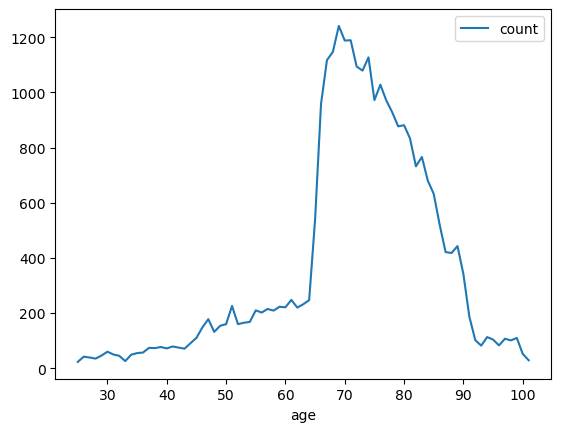

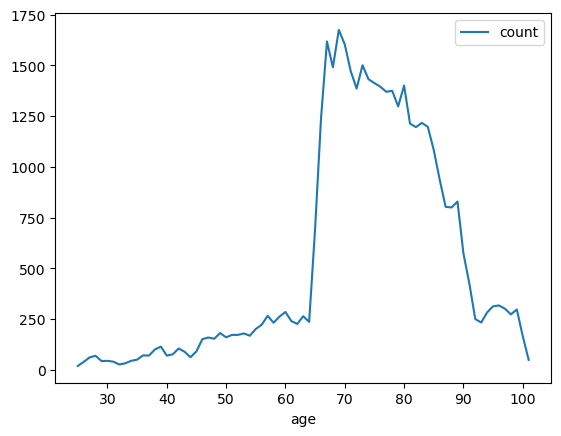

In [45]:
df.where(df.gender_concept_id == 8507).dropna().plot(x='age', y='count')
df.where(df.gender_concept_id == 8532).dropna().plot(x='age', y='count')